                                                                         TASK-5

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

import os
import warnings

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)

In [6]:
# Read the CSV file into a DataFrame
data_frame = pd.read_csv(r'C:\Users\boyal\OneDrive\Desktop\Task-5 Data Science\Covid-19\country_wise_latest.csv')
data_frame

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [7]:
data_frame.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [8]:
data_info= data_frame.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [9]:
print('Data frame columns are summerize as- \n:')
data_frame.describe()

Data frame columns are summerize as- 
:


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [10]:
data_frame.isnull()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
print(data_frame.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [12]:
df_cleaned = data_frame.dropna()

In [13]:
total_confirmed = data_frame['Confirmed'].sum()
total_recovered = data_frame['Recovered'].sum()
total_death = data_frame['Deaths'].sum()
print("Total Conformed case", total_confirmed)
print("Total Recovered case", total_recovered)
print('Total Death case', total_death)

Total Conformed case 16480485
Total Recovered case 9468087
Total Death case 654036


In [14]:
sort_confirmed = data_frame.sort_values(by = 'Confirmed', ascending = False)
print(sort_confirmed.head(5))

    Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173             US    4290259  148011    1325804  2816444      56336   
23          Brazil    2442375   87618    1846641   508116      23284   
79           India    1480073   33408     951166   495499      44457   
138         Russia     816680   13334     602249   201097       5607   
154   South Africa     452529    7067     274925   170537       7096   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                  30.90   
23          614          33728                3.59                  75.61   
79          637          33598                2.26                  64.26   
138          85           3077                1.63                  73.74   
154         298           9848                1.56                  60.75   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16          

In [15]:
print(sort_confirmed.tail(5))

            Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
49                Dominica         18       0         18       0          0   
140  Saint Kitts and Nevis         17       0         15       2          0   
68               Greenland         14       0         13       1          1   
75                Holy See         12       0         12       0          0   
183         Western Sahara         10       1          8       1          0   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
49            0              0                 0.0                 100.00   
140           0              0                 0.0                  88.24   
68            0              0                 0.0                  92.86   
75            0              0                 0.0                 100.00   
183           0              0                10.0                  80.00   

     Deaths / 100 Recovered  Confirmed last week  1 week chang

In [16]:
sort_deaths = data_frame.sort_values(by = 'Deaths', ascending = False)
print(sort_deaths.head(5))

     Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173              US    4290259  148011    1325804  2816444      56336   
23           Brazil    2442375   87618    1846641   508116      23284   
177  United Kingdom     301708   45844       1437   254427        688   
111          Mexico     395489   44022     303810    47657       4973   
85            Italy     246286   35112     198593    12581        168   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                  30.90   
23          614          33728                3.59                  75.61   
177           7              3               15.19                   0.48   
111         342           8588               11.13                  76.82   
85            5            147               14.26                  80.64   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16    

In [17]:
print(sort_deaths.tail(5))

    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
94            Laos         20       0         19       1          0   
68       Greenland         14       0         13       1          1   
30        Cambodia        226       0        147      79          1   
69         Grenada         23       0         23       0          0   
114       Mongolia        289       0        222      67          1   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
94            0              0                 0.0                  95.00   
68            0              0                 0.0                  92.86   
30            0              4                 0.0                  65.04   
69            0              0                 0.0                 100.00   
114           0              4                 0.0                  76.82   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
94                      0.0                

In [18]:
sort_recovered = data_frame.sort_values(by = 'Recovered', ascending = False)
print(sort_recovered.head(5))

    Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
23          Brazil    2442375   87618    1846641   508116      23284   
173             US    4290259  148011    1325804  2816444      56336   
79           India    1480073   33408     951166   495499      44457   
138         Russia     816680   13334     602249   201097       5607   
35           Chile     347923    9187     319954    18782       2133   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
23          614          33728                3.59                  75.61   
173        1076          27941                3.45                  30.90   
79          637          33598                2.26                  64.26   
138          85           3077                1.63                  73.74   
35           75           1859                2.64                  91.96   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
23                     4.74          

In [19]:
print(sort_recovered.tail(5))

    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
32          Canada     116458    8944          0  107514        682   
168    Timor-Leste         24       0          0      24          0   
147         Serbia      24141     543          0   23598        411   
163          Syria        674      40          0     634         24   
161         Sweden      79395    5700          0   73695        398   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
32           11              0                7.68                    0.0   
168           0              0                0.00                    0.0   
147           9              0                2.25                    0.0   
163           2              0                5.93                    0.0   
161           3              0                7.18                    0.0   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
32                      inf               1

In [20]:
sort_active = data_frame.sort_values(by = 'Active', ascending = False)
print(sort_active.head(5))

     Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173              US    4290259  148011    1325804  2816444      56336   
23           Brazil    2442375   87618    1846641   508116      23284   
79            India    1480073   33408     951166   495499      44457   
177  United Kingdom     301708   45844       1437   254427        688   
138          Russia     816680   13334     602249   201097       5607   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                  30.90   
23          614          33728                3.59                  75.61   
79          637          33598                2.26                  64.26   
177           7              3               15.19                   0.48   
138          85           3077                1.63                  73.74   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16    

In [21]:
print(sort_active.tail(5))

    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
75        Holy See         12       0         12       0          0   
143     San Marino        699      42        657       0          0   
24          Brunei        141       3        138       0          0   
49        Dominica         18       0         18       0          0   
69         Grenada         23       0         23       0          0   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
75            0              0                0.00                 100.00   
143           0              0                6.01                  93.99   
24            0              0                2.13                  97.87   
49            0              0                0.00                 100.00   
69            0              0                0.00                 100.00   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
75                     0.00                

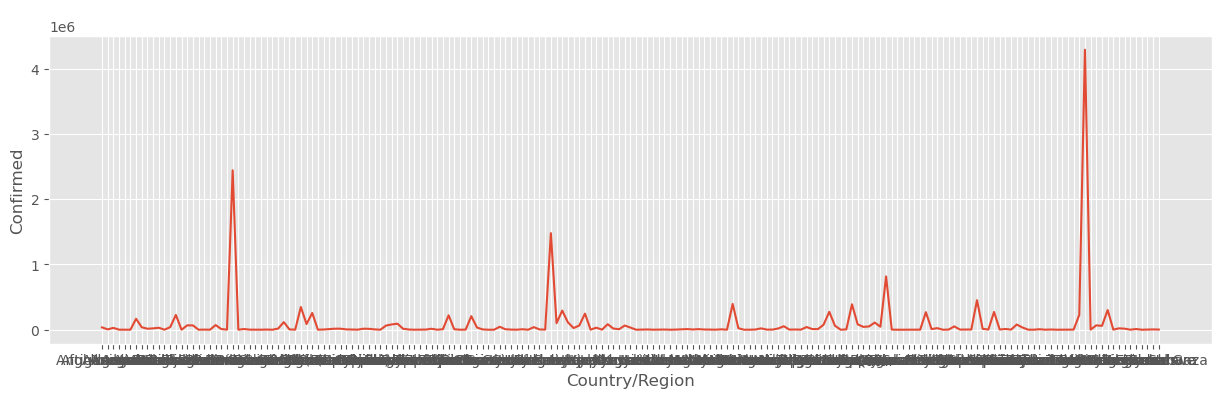

In [22]:
#Plotting Confirmed case countrywise
plt.style.use('dark_background')
plt.style.use('ggplot')
plt.figure(figsize= (15, 4))
plt.plot(data_frame['Country/Region'],data_frame['Confirmed'])
plt.xlabel("Country/Region")
plt.ylabel('Confirmed')
plt.title('Confirmed case countrywise', fontsize=16, fontweight='bold', style='italic')
plt.show()

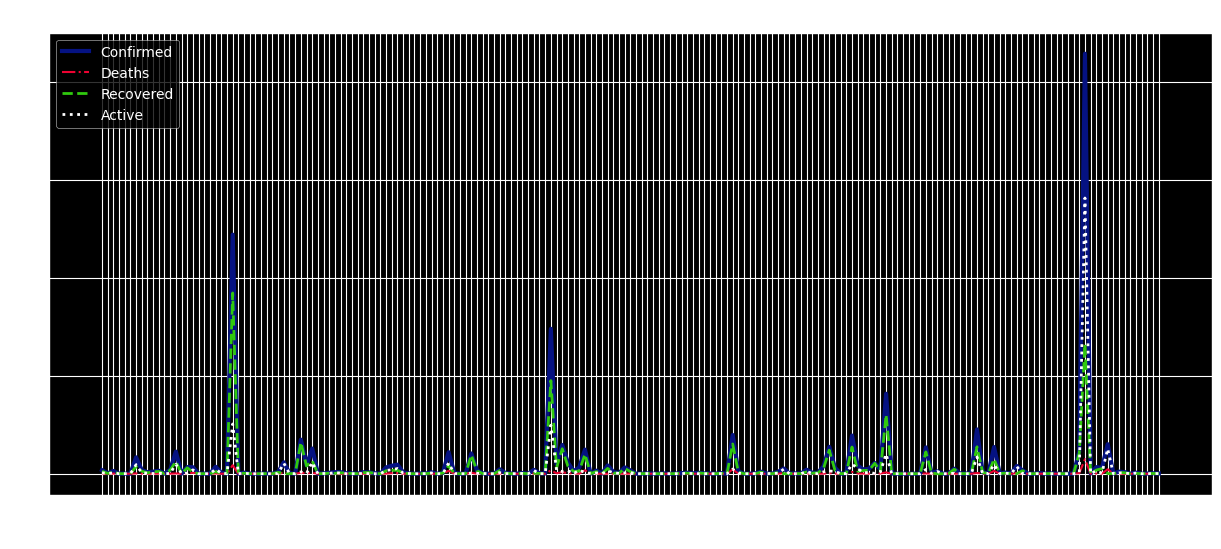

In [23]:
plt.figure(figsize = (15,6))
plt.style.use('dark_background')

# Plotting Confirmed cases
plt.plot(data_frame['Country/Region'], data_frame['Confirmed'],linestyle = '-',color = '#051282',label = 'Confirmed',lw = 3)

# Plotting Deaths
plt.plot(data_frame['Country/Region'], data_frame['Deaths'],linestyle = '-.',color = '#ed0231',label = 'Deaths')

# Plotting Recovered cases
plt.plot(data_frame['Country/Region'], data_frame['Recovered'],linestyle = '--',color = '#30c90e',label = 'Recovered',lw = 2)

# Plotting active cases
plt.plot(data_frame['Country/Region'], data_frame['Active'],linestyle = ':',color = 'w',label = 'Active',lw = 2)
plt.xlabel('Country/Region')
plt.ylabel('No: of cases (in millions)')
plt.title('Global Trend of Covid Cases')
plt.legend()
plt.show()

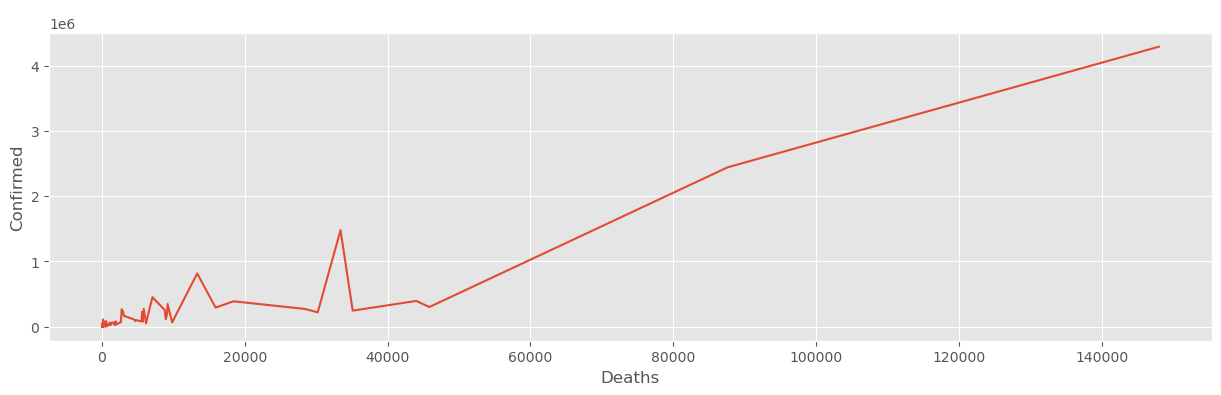

In [24]:
plt.style.use('dark_background')
plt.style.use('ggplot')
plt.figure(figsize= (15, 4))
sns.lineplot(x = "Deaths", y = "Confirmed", data = data_frame)
plt.title('Confirmed case vs Deathcase')
plt.show()

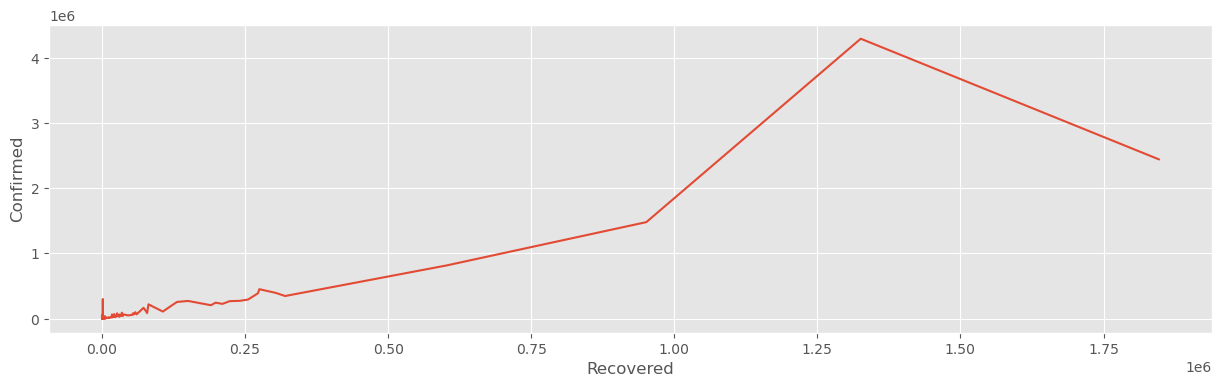

In [25]:
plt.style.use('dark_background')
plt.style.use('ggplot')
plt.figure(figsize= (15, 4))
sns.lineplot(x = "Recovered", y = "Confirmed", data = data_frame)
plt.show()

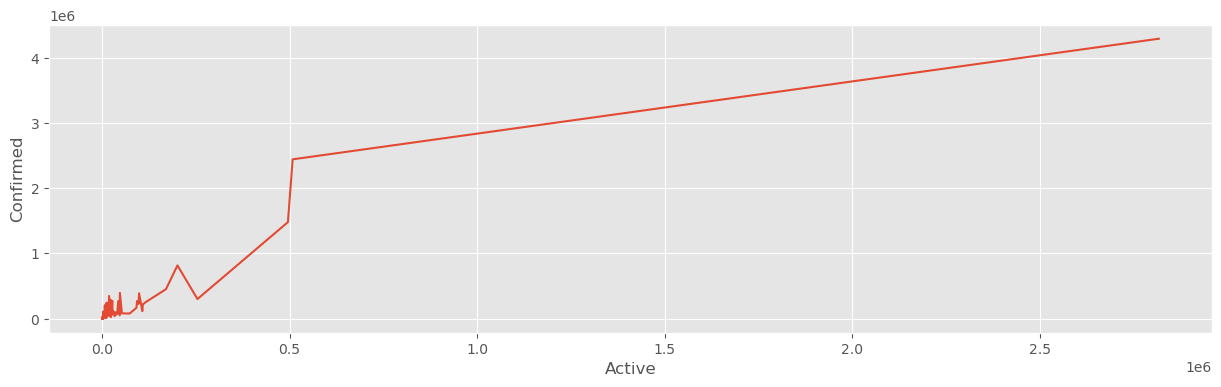

In [26]:
plt.style.use('ggplot')
plt.figure(figsize= (15, 4))
sns.lineplot(x = "Active", y= 'Confirmed', data = data_frame)
plt.show()

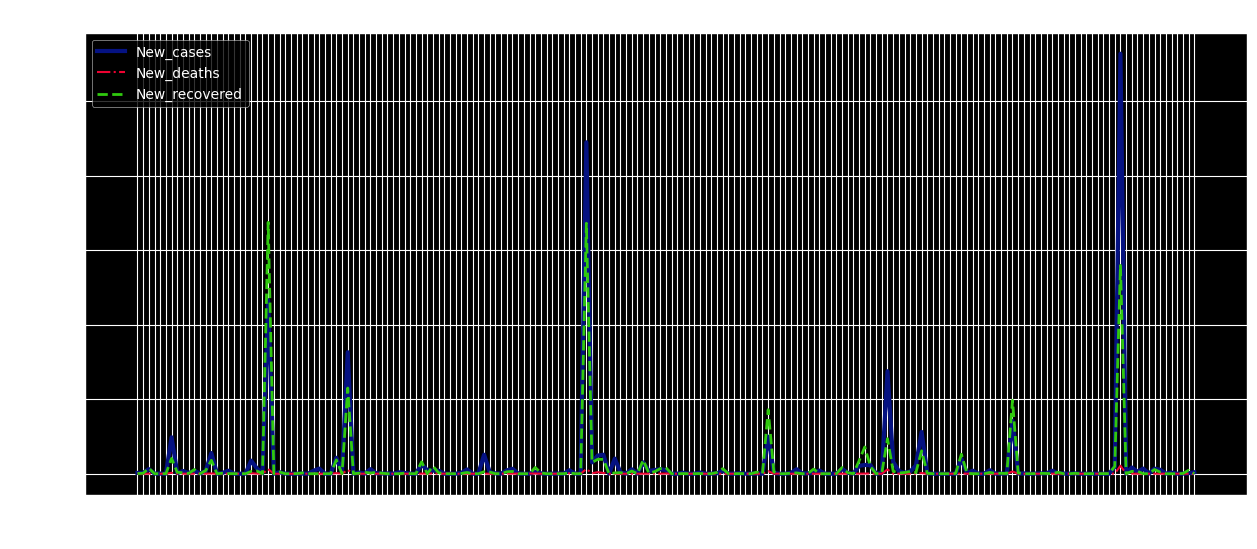

In [27]:
plt.figure(figsize = (15,6))
plt.style.use('dark_background')

# Plotting New cases
plt.plot(data_frame['Country/Region'], data_frame['New cases'],linestyle = '-',color = '#051282',label = 'New_cases',lw = 3)

# Plotting New Death cases
plt.plot(data_frame['Country/Region'], data_frame['New deaths'],linestyle = '-.',color = '#ed0231',label = 'New_deaths')

# Plotting New Recovered cases
plt.plot(data_frame['Country/Region'], data_frame['New recovered'],linestyle = '--',color = '#30c90e',label = 'New_recovered',lw = 2)
plt.xlabel('Country')
plt.ylabel('No: of cases')
plt.title('Global Trend of New Covid Cases')
plt.legend()
plt.show()

WHO Region
Western Pacific           292428
Africa                    723207
Eastern Mediterranean    1490744
South-East Asia          1835297
Europe                   3299523
Americas                 8839286
Name: Confirmed, dtype: int64


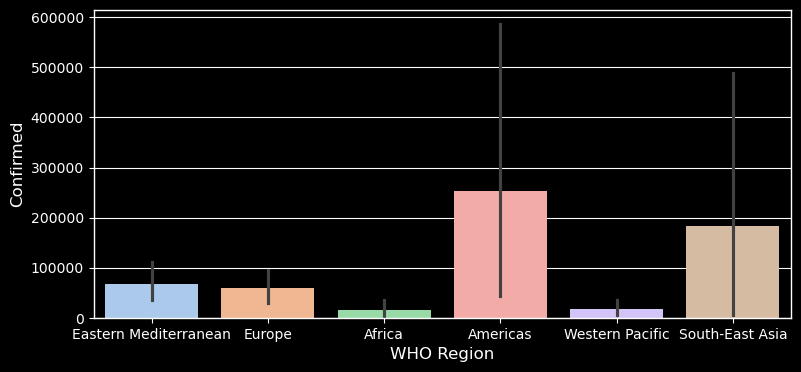

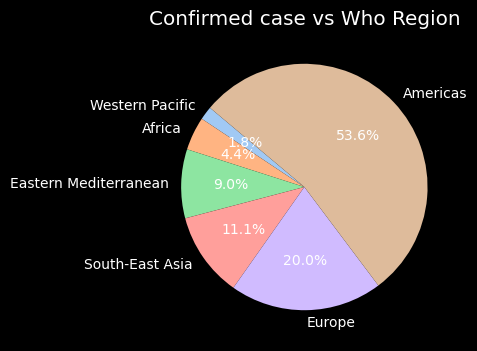

In [28]:
Who_regionscon = data_frame.groupby('WHO Region')['Confirmed'].sum().sort_values()
print(Who_regionscon)


#Data Visullization of Confirmed Case of WHO Reason

#bar graph
plt.style.use('ggplot')
plt.style.use('dark_background')
plt.figure(figsize=(9, 4))
sns.barplot(x="WHO Region", y= 'Confirmed',data = data_frame, palette='pastel')

#Piechart
plt.figure(figsize=(4, 4))
plt.pie(Who_regionscon, labels=Who_regionscon.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title("Confirmed case vs Who Region")
plt.show()

WHO Region
Western Pacific            8249
Africa                    12223
Eastern Mediterranean     38339
South-East Asia           41349
Europe                   211144
Americas                 342732
Name: Deaths, dtype: int64


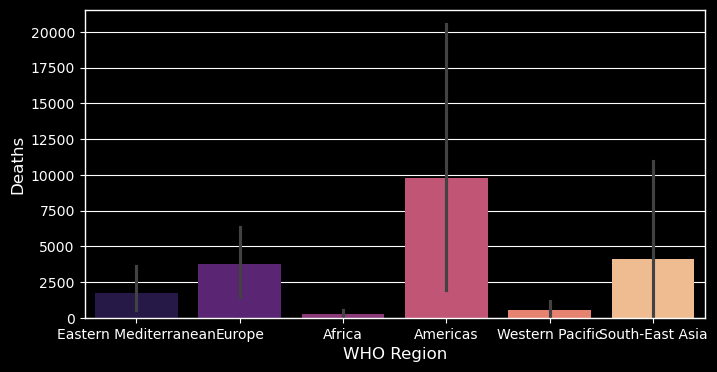

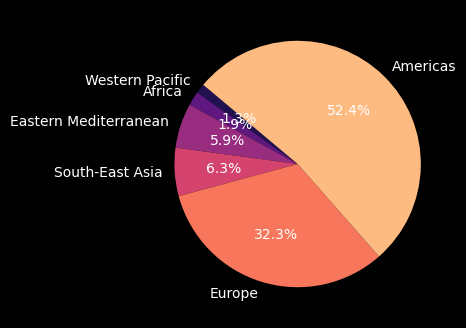

In [29]:
Who_regionsdea = data_frame.groupby('WHO Region')['Deaths'].sum().sort_values()
print(Who_regionsdea)


#Data Visullization Deathcase of WHO Region

#Bar graph
plt.style.use('ggplot')
plt.style.use('dark_background')
plt.figure(figsize = (8,4))
sns.barplot(x="WHO Region", y= 'Deaths',data = data_frame, palette='magma')

#piechart
plt.figure(figsize=(4, 4))
plt.pie(Who_regionsdea, labels=Who_regionsdea.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('magma'))
plt.show()

WHO Region
Western Pacific           206770
Africa                    440645
South-East Asia          1156933
Eastern Mediterranean    1201400
Europe                   1993723
Americas                 4468616
Name: Recovered, dtype: int64


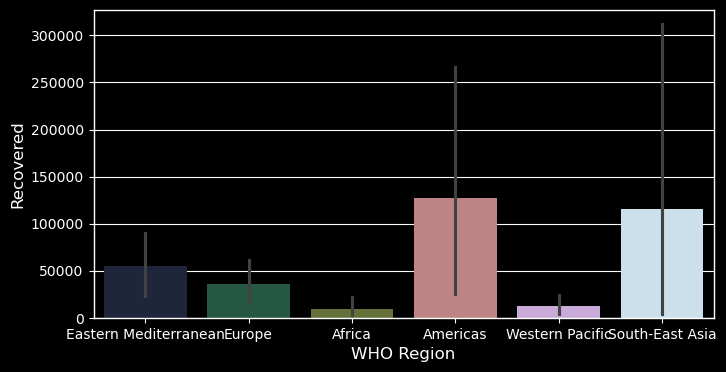

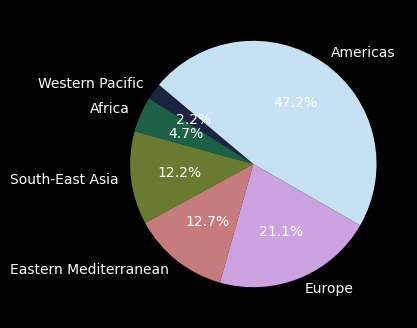

In [30]:
Who_regionsrec = data_frame.groupby('WHO Region')['Recovered'].sum().sort_values()
print(Who_regionsrec)


# Data Visullization of Recovered case of Who Region

#Bar Plot
plt.style.use('ggplot')
plt.style.use('dark_background')
plt.figure(figsize = (8,4))
sns.barplot(x="WHO Region", y= 'Recovered',data = data_frame, palette='cubehelix')

#Piechart
plt.figure(figsize=(4, 4))
plt.pie(Who_regionsrec, labels=Who_regionsrec.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('cubehelix'))
plt.show()

WHO Region
Western Pacific            77409
Eastern Mediterranean     251005
Africa                    270339
South-East Asia           637015
Europe                   1094656
Americas                 4027938
Name: Active, dtype: int64


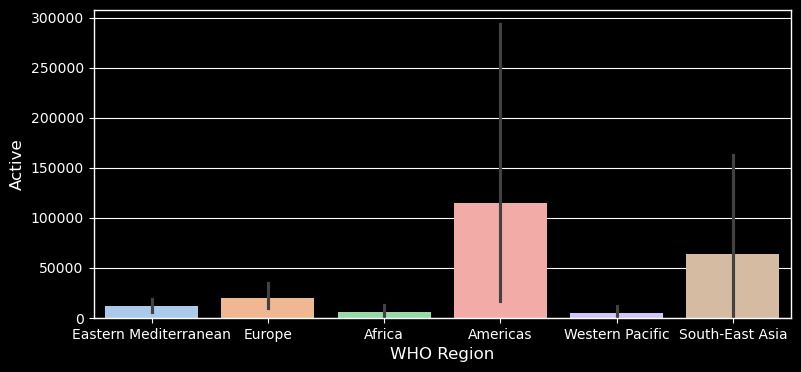

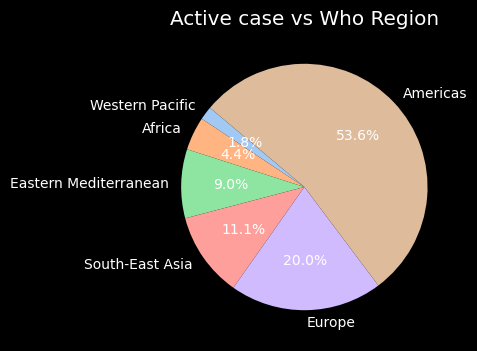

In [31]:
Who_regionsact = data_frame.groupby('WHO Region')['Active'].sum().sort_values()
print(Who_regionsact)


#Data Visullization of Active Case of WHO Reason

#bar graph
plt.style.use('ggplot')
plt.style.use('dark_background')
plt.figure(figsize=(9, 4))
sns.barplot(x="WHO Region", y= 'Active',data = data_frame, palette='pastel')

#Piechart
plt.figure(figsize=(4, 4))
plt.pie(Who_regionscon, labels=Who_regionscon.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title("Active case vs Who Region")
plt.show()

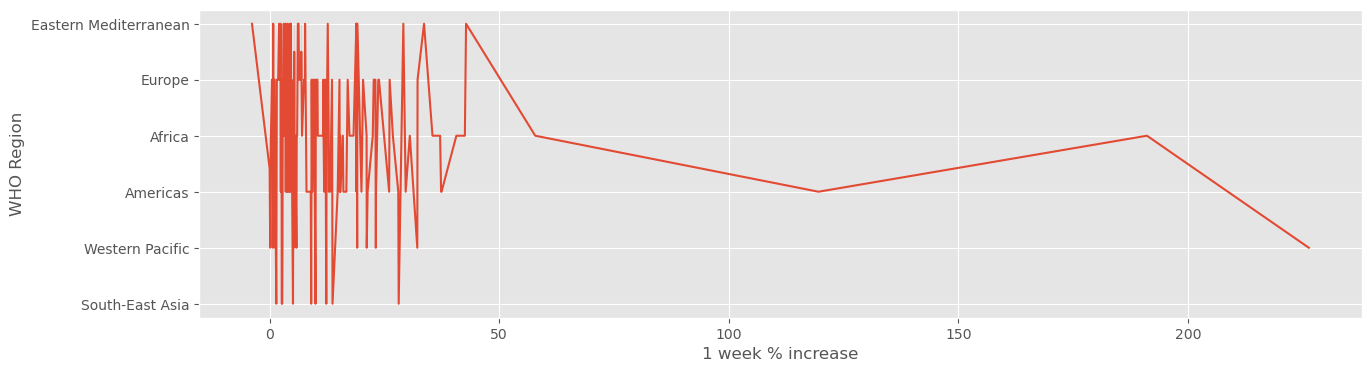

In [35]:
# Data Visullization of 1 week % increase
plt.style.use('ggplot')
plt.figure(figsize= (15, 4))
sns.lineplot(x='1 week % increase', y= "WHO Region", data = data_frame)
plt.show()

    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
119          Nepal      18752      48      13754    4950        139   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
119           3            626                0.26                  73.35   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
119                    0.35                17844            908   

     1 week % increase       WHO Region  
119               5.09  South-East Asia  


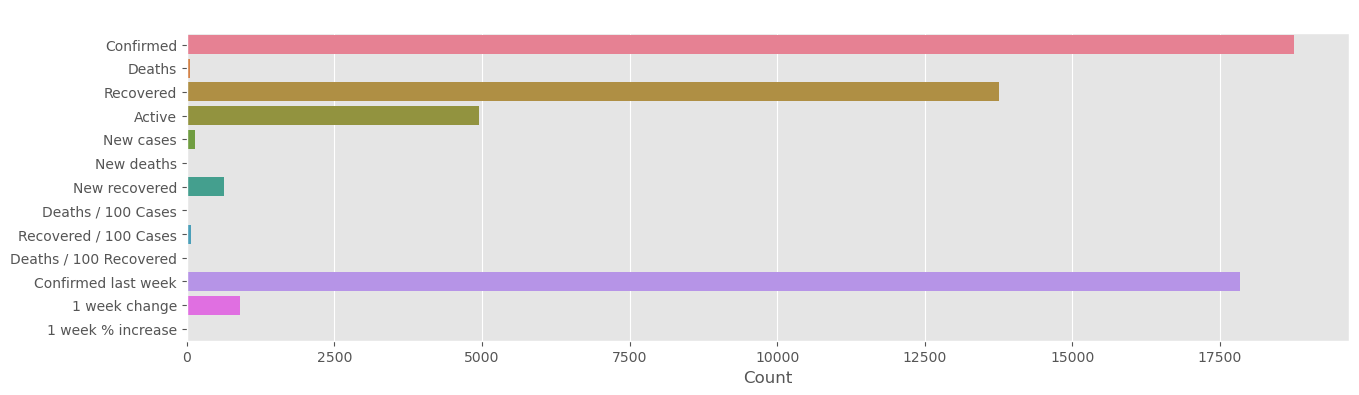

In [36]:
# Data loading of Nepal
nepal = data_frame[data_frame['Country/Region'] == 'Nepal']
print(nepal)


# Data Visullization of Nepal
plt.figure(figsize= (15, 4))
sns.barplot(nepal, orient = 'h')
plt.xlabel("Count")
plt.title('Nepal')
plt.show()